In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class Scen_gen():
    def __init__(self, spot, drift, vol):
        self.spot = spot
        self.drift = drift
        self.vol = vol
        
    #def LV(self, s, t):
                
    def MC(self, sims, timesteps, dt):
        x = np.zeros((sims, timesteps))
        for i in range(sims):
            x[i, 0] = self.spot
            for j in range(1, timesteps):
                z1 = np.random.normal(0,1)
                #local_vol = LV(x[i, j - 1], j * dt)
                x[i,j] = x[i, j-1] * np.exp((self.drift - 0.5 * self.vol ** 2)* dt + (self.vol * dt ** 0.5 * z1))
        return x                                      

In [77]:
class EuroOptionPricer():
    def __init__(self, spot, strike, maturity, drift):
        self.spot = spot
        self.strike = strike
        self.maturity = maturity
        self.drift = drift
    
    def european_call_price(self, scenarios):
        # Calculate the payoff for each scenario at maturity
        call_payoffs = np.maximum(scenarios[:, -1] - self.strike, 0)
        
        # Calculate the option price as the expected value of the payoffs
        option_price = np.mean(call_payoffs) * np.exp(-self.maturity * self.drift)
        
        return option_price

    def european_put_price(self, scenarios):
        # Calculate the payoff for each scenario at maturity
        put_payoffs = np.maximum(self.strike - scenarios[:, -1], 0)
        
        # Calculate the option price as the expected value of the payoffs
        option_price = np.mean(put_payoffs) * np.exp(-self.maturity * self.drift)
        
        return option_price

# Example usage
spot_price = 100
strike_price = 100
time_to_maturity = 1
drift = 0
vol = 0.2


# Create an instance of Scen_gen to generate scenarios
scenario_generator = Scen_gen(spot_price, drift, vol)

# Generate Monte Carlo scenarios
num_simulations = 10000
num_time_steps = 50
time_step_size = time_to_maturity / num_time_steps
scenarios = scenario_generator.MC(num_simulations, num_time_steps, time_step_size)

# Create an instance of OptionPricer to price the option
option_pricer = EuroOptionPricer(spot_price, strike_price, time_to_maturity, drift)

# Calculate the European call and put option prices
call_option_price = option_pricer.european_call_price(scenarios)
put_option_price = option_pricer.european_put_price(scenarios)

print(f"Theoretical European Call Option Price: {call_option_price:.2f}")
print(f"Theoretical European Put Option Price: {put_option_price:.2f}")


Theoretical European Call Option Price: 7.86
Theoretical European Put Option Price: 7.75


In [78]:
def black_scholes(S, K, T, r, sigma, option_type='call'):

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        N_d1 = norm.cdf(d1)
        N_d2 = norm.cdf(d2)
        option_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    elif option_type == 'put':
        N_d1 = norm.cdf(-d1)
        N_d2 = norm.cdf(-d2)
        option_price = K * np.exp(-r * T) * N_d2 - S * N_d1
    else:
        raise ValueError("Option type must be 'call' or 'put'.")

    return option_price

# Example usage
S = 100  # Current stock price
K = 100  # Strike price
T = 1  # Time to expiration (in years)
r = 0  # Risk-free interest rate (5% annual)
sigma = 0.2  # Volatility (20% annual)

call_option_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_option_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Theoretical Call Option Price: {call_option_price:.2f}")
print(f"Theoretical Put Option Price: {put_option_price:.2f}")

Theoretical Call Option Price: 7.97
Theoretical Put Option Price: 7.97


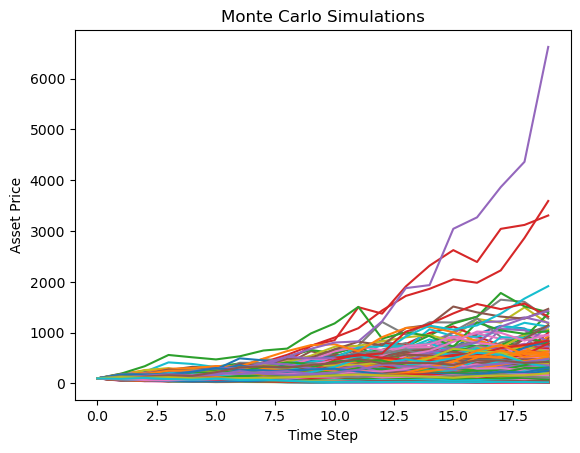

In [81]:

scenario = Scen_gen(spot=100, drift=0.05, vol=0.2)


simulations = scenario.MC(sims=1000, timesteps=20, dt=1)


for i in range(1000):
    plt.plot(simulations[i])
plt.xlabel('Time Step')
plt.ylabel('Asset Price')
plt.title('Monte Carlo Simulations')
plt.show()


Implied volatility grid has been written to 'implied_volatility_grid.txt'.


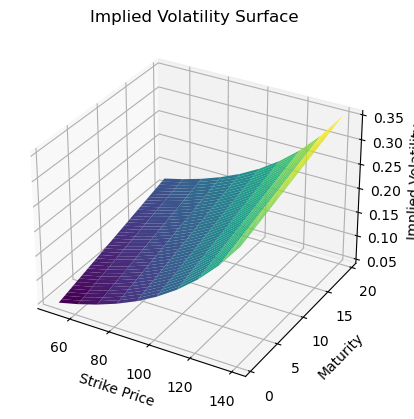

In [42]:
strikes = np.arange(50, 150, 10)
maturities = np.arange(0.5, 20, 0.5)

grid = np.zeros((len(strikes), len(maturities)))

def implied_volatility_smile(strike, maturity):
    a = 0.5  # Parameter controlling the smile shape
    b = 0.02  # Parameter controlling the smile shift
    c = 0.6  # Parameter controlling the slope of volatility with maturity
    return (a * np.exp(b * strike) + 0.2 * (c * maturity))/30

for i in range(len(strikes)):
    for j in range(len(maturities)):
        implied_volatility = implied_volatility_smile(strikes[i], maturities[j])
        grid[i,j] = implied_volatility 
        
#print(grid)

filename = "implied_volatility_grid.txt"

with open(filename, "w") as file:
    file.write("\t" + "\t".join(map(str, maturities)) + "\n")
    for i in range(len(strikes)):
        file.write(str(strikes[i]) + "\t" + "\t".join(map(str, grid[i])) + "\n")

print(f"Implied volatility grid has been written to '{filename}'.")

strike_grid, maturity_grid = np.meshgrid(strikes, maturities)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(strike_grid, maturity_grid, grid.T, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')

# Set a title for the plot
ax.set_title('Implied Volatility Surface')

# Show the plot
plt.show()

Theoretical Call Option Price: 4.58
Theoretical Put Option Price: 6.99
